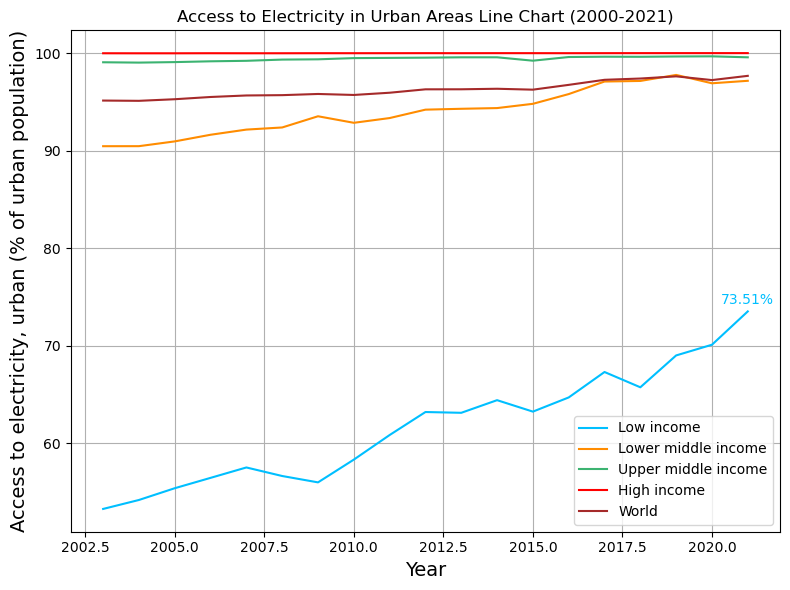

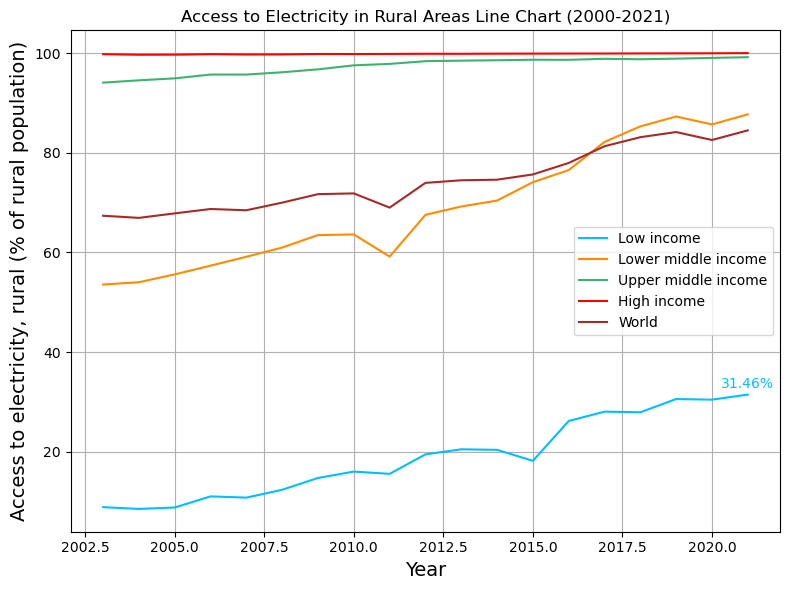

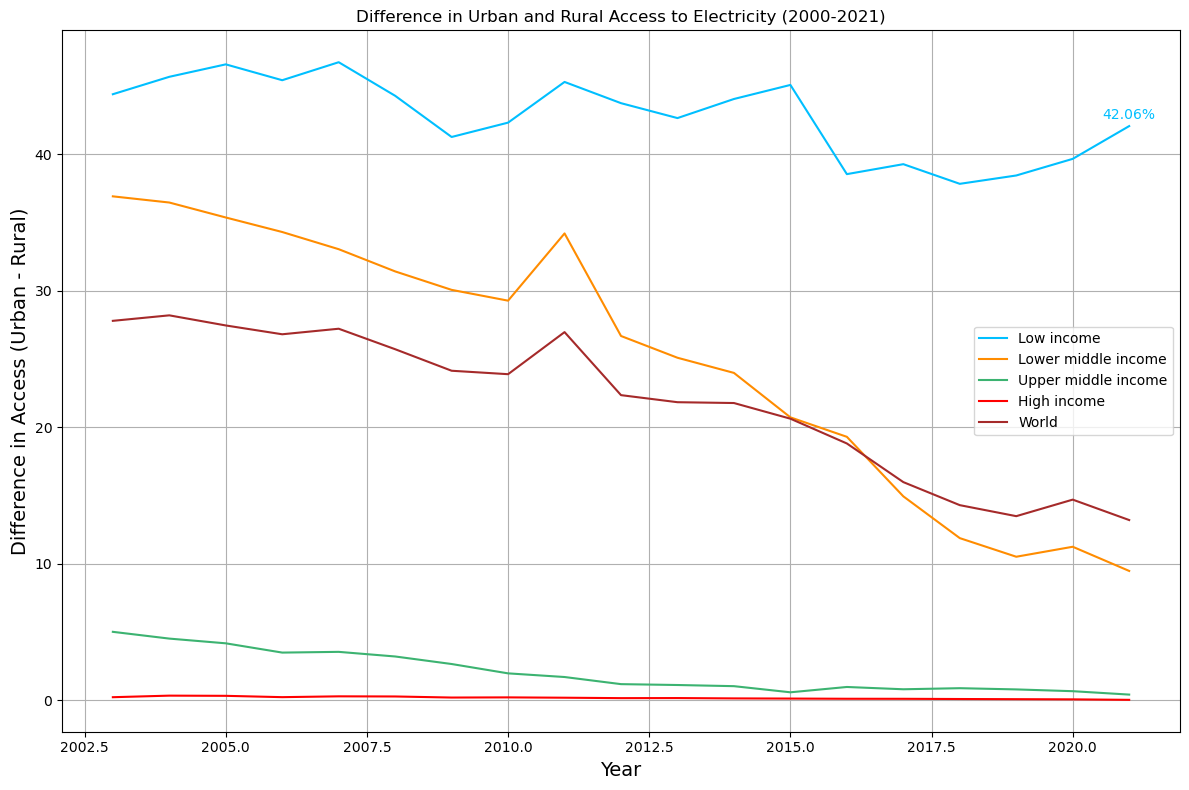

,Actual(2021),LR(2022),RF(2022),GBM(2022)
Low income,73.51,71.87,72.21,73.51
Lower middle income,97.16,98.26,97.12,97.16
Upper middle income,99.57,99.76,99.60,99.57
High income,100.00,100.00,100.00,100.00
World,97.67,97.71,97.55,97.67


,Actual(2021),LR(2022),RF(2022),GBM(2022)
Low income,31.46,32.92,31.04,31.45
Lower middle income,87.70,89.83,87.04,87.69
Upper middle income,99.16,100.23,99.10,99.16
High income,99.98,99.98,99.96,99.98
World,84.48,84.92,83.92,84.47


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from IPython.display import display

#Remove warning
import warnings
warnings.filterwarnings('ignore')

# Load the CSV data into a DataFrame
df = pd.read_csv('CSV_7.1.1.csv')

# Modify the entities dictionary
entities = {
    'Low income': 'deepskyblue',
    'Lower middle income': 'darkorange',
    'Upper middle income': 'mediumseagreen',
    'High income': 'red',
    'World': 'brown'
}

# Filter the data for years 2003 to 2021 and make a copy to prevent warnings
df_filtered = df[(df['Year'] >= 2003) & (df['Year'] <= 2021)].copy()

# Get the 2021 value for Low income for annotations
low_income_2021_check = df[(df['Entity'] == 'Low income') & (df['Year'] == 2021)]



# Chart 5.5 Access to Electricity in Urban Areas (2000-2021)
plt.figure(figsize=(8, 6))
for entity, color in entities.items():
    entity_data = df_filtered[df_filtered['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Access to electricity, urban (% of urban population)'], label=entity, color=color)
    if entity == 'Low income':
        plt.annotate(f"{low_income_2021_check['Access to electricity, urban (% of urban population)'].values[0]:.2f}%", 
                     (2021, low_income_2021_check['Access to electricity, urban (% of urban population)'].values[0]),
                     textcoords="offset points", xytext=(0,5), ha='center', color=color)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Access to electricity, urban (% of urban population)', fontsize=14)
plt.title('Access to Electricity in Urban Areas Line Chart (2000-2021)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart 5.6 Access to Electricity in Rural Areas (2000-2021) 
plt.figure(figsize=(8, 6))
for entity, color in entities.items():
    entity_data = df_filtered[df_filtered['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Access to electricity, rural (% of rural population)'], label=entity, color=color)
    if entity == 'Low income':
        plt.annotate(f"{low_income_2021_check['Access to electricity, rural (% of rural population)'].values[0]:.2f}%", 
                     (2021, low_income_2021_check['Access to electricity, rural (% of rural population)'].values[0]),
                     textcoords="offset points", xytext=(0,5), ha='center', color=color)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Access to electricity, rural (% of rural population)', fontsize=14)
plt.title('Access to Electricity in Rural Areas Line Chart (2000-2021)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart 5.7 Difference in Urban and Rural Access Over Time
df_filtered['Difference'] = df_filtered['Access to electricity, urban (% of urban population)'] - df_filtered['Access to electricity, rural (% of rural population)']
plt.figure(figsize=(12, 8))
for entity, color in entities.items():
    entity_data = df_filtered[df_filtered['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Difference'], label=entity, color=color)
    if entity == 'Low income':
        diff_value = low_income_2021_check['Access to electricity, urban (% of urban population)'].values[0] - \
                     low_income_2021_check['Access to electricity, rural (% of rural population)'].values[0]
        plt.annotate(f"{diff_value:.2f}%", 
                     (2021, diff_value),
                     textcoords="offset points", xytext=(0,5), ha='center', color=color)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Difference in Access (Urban - Rural)', fontsize=14)
plt.title('Difference in Urban and Rural Access to Electricity (2000-2021)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Table 5.3 2022 forecast function for both urban and rural
def forecast_2022(entity, feature_col):
    entity_data = df_filtered[df_filtered['Entity'] == entity][['Year', feature_col]]
    X = entity_data[['Year']]
    y = entity_data[feature_col]
    lr = LinearRegression().fit(X, y)
    rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X, y)
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42).fit(X, y)
    year_2022 = pd.DataFrame([2022], columns=['Year'])
    return lr.predict(year_2022)[0], rf.predict(year_2022)[0], gb.predict(year_2022)[0]

# Forecasting values for urban and rural populations for 2022
forecasted_values_urban = {entity: forecast_2022(entity, 'Access to electricity, urban (% of urban population)') for entity in entities}
forecasted_values_rural = {entity: forecast_2022(entity, 'Access to electricity, rural (% of rural population)') for entity in entities}

# Get 2021 values for urban and rural populations
values_2021_urban = df_filtered[df_filtered['Year'] == 2021].set_index('Entity')['Access to electricity, urban (% of urban population)'].to_dict()
values_2021_rural = df_filtered[df_filtered['Year'] == 2021].set_index('Entity')['Access to electricity, rural (% of rural population)'].to_dict()

# Create DataFrames for urban and rural forecasted values
df_combined_urban = pd.DataFrame.from_dict(forecasted_values_urban, orient='index', columns=['LR(2022)', 'RF(2022)', 'GBM(2022)'])
df_combined_rural = pd.DataFrame.from_dict(forecasted_values_rural, orient='index', columns=['LR(2022)', 'RF(2022)', 'GBM(2022)'])

# Insert 2021 values for urban and rural populations
df_combined_urban.insert(0, 'Actual(2021)', df_combined_urban.index.map(values_2021_urban))
df_combined_rural.insert(0, 'Actual(2021)', df_combined_rural.index.map(values_2021_rural))

# Style the DataFrames for better visualization (for both urban and rural populations)
styled_table_urban = df_combined_urban.style.set_table_attributes("border=1; font-size: 12pt") \
                                           .set_caption("<span style='font-size: 12pt;'>Predicted Value 2022 (% Urban Population)</span>") \
                                           .format("{:.2f}")
styled_table_rural = df_combined_rural.style.set_table_attributes("border=1; font-size: 12pt") \
                                           .set_caption("<span style='font-size: 12pt;'>Predicted Value 2022 (% Rural Population)</span>") \
                                           .format("{:.2f}")

# Display the styled tables
display(styled_table_urban)
display(styled_table_rural)

# Python codes are available on GitHub at: https://github.com/BlockQuant18/SU-PHD-TM